<a href="https://colab.research.google.com/github/Danish-Hussain-DSAI/final-year-project-fake-vs-real-images-/blob/main/final_year_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import pandas as pd
import cv2
import numpy as np
import tensorflow as tf
import cv2
import matplotlib.pyplot as plt


In [ ]:
from tensorflow.keras.preprocessing import image

# Specify the directories for real and fake images
real_images_dir = '/content/drive/MyDrive/fyp/real'
fake_images_dir = '/content/drive/MyDrive/fyp/fake'

# Function to load and preprocess images from a directory
def load_images(directory, label):
    images = []
    labels = []
    for filename in os.listdir(directory):
        if filename.endswith(('jpeg', 'jpg', 'png', 'gif')):
            img_path = os.path.join(directory, filename)

            #load images into memory
            img = image.load_img(img_path, target_size=(128, 128))
          #convert image into numpy array
            img = image.img_to_array(img)
            img = np.expand_dims(img, axis=0)
            images.append(img)
            labels.append(label)
    return np.vstack(images), np.array(labels)




In [ ]:
# Load and preprocess 'real' images
x_real, y_real = load_images(real_images_dir, label=1)

# Load and preprocess 'fake' images
x_fake, y_fake = load_images(fake_images_dir, label=0)



In [ ]:
# Concatenate the real and fake data and labels
X = np.concatenate((x_real, x_fake), axis=0)
y = np.concatenate((y_real, y_fake), axis=0)


In [ ]:
import cv2
import numpy as np

#NumPy array containing images in the shape (num_samples, height, width, channels)
# where channels can be 1 (grayscale) or 3 (RGB)

# Convert images to RGB format
def convert_to_rgb(images):
    rgb_images = []
    for img in images:
        if img.shape[2] == 1:
            # Convert grayscale to RGB
            rgb_img = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)
        else:
            # Convert BGR (OpenCV's default) to RGB
            rgb_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        rgb_images.append(rgb_img)
    return np.array(rgb_images)

# Assuming X is the NumPy array containing the images
# Convert all images in X to RGB
X_rgb = convert_to_rgb(X)

#re assign
X=X_rgb

# Verify the color format (it should be RGB)
print('Color format of the first image:', X[78].shape)


Color format of the first image: (128, 128, 3)


In [ ]:
print(np.shape(X))
print(np.shape(Y))

(5640, 128, 128, 3)
(5640,)


In [ ]:
import sklearn
from sklearn.utils import shuffle
#Shuffle the dataset while maintaining the correspondence
X, y = shuffle(X, y, random_state=42)

# Print the shape of the final data and labels
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

Shape of X: (1410, 128, 128, 3)
Shape of y: (1410,)


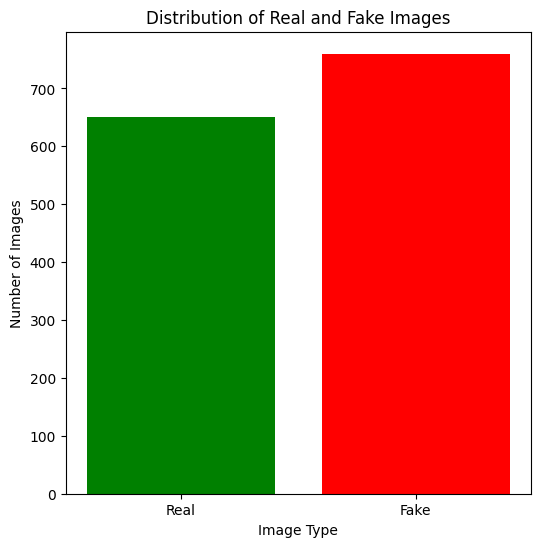

In [ ]:
# show number of real images and fake images using bar chart

# Count the number of real and fake images
num_real_images = sum(label == 1 for label in y)
num_fake_images = sum(label == 0 for label in y)

# Data for the bar chart
labels = ['Real', 'Fake']
values = [num_real_images, num_fake_images]
colors = ['green', 'red']

# Plotting the bar chart
plt.figure(figsize=(6, 6))
plt.bar(labels, values, color=colors)

# Adding labels and title
plt.xlabel('Image Type')
plt.ylabel('Number of Images')
plt.title('Distribution of Real and Fake Images')

# Display the bar chart
plt.show()


In [ ]:
X=np.array(X)
Y=np.array(y)

In [ ]:
print(f'shape of inputs X :{np.shape(X)}')
print(f'shape of labels Y :{np.shape(Y)}')

shape of inputs X :(1410, 128, 128, 3)
shape of labels Y :(1410,)


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Initialize the ImageDataGenerator for data augmentation
augmentation_generator = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Initialize lists to store augmented data and labels
augmented_data = []
augmented_labels = []

# Number of augmentations per image
num_augmentations = 3  # Adjust as needed

# Perform data augmentation for each image in X
for i in range(len(X)):
    img = X[i]
    label = y[i]

    # Reshape the image to (1, height, width, channels) as required by ImageDataGenerator
    img = np.reshape(img, (1,) + img.shape)

    # Generate augmented images
    augmented_images = augmentation_generator.flow(img, batch_size=num_augmentations)

    # Append augmented images and labels
    for _ in range(num_augmentations):
        augmented_img = augmented_images.next()[0]
        augmented_data.append(augmented_img)
        augmented_labels.append(label)

# Convert lists to arrays
augmented_data = np.array(augmented_data)
augmented_labels = np.array(augmented_labels)

# Append augmented data to X and labels to y
X_augmented = np.concatenate((X, augmented_data), axis=0)
y_augmented = np.concatenate((y, augmented_labels), axis=0)

# Shuffle the augmented dataset
X_augmented, y_augmented = shuffle(X_augmented, y_augmented, random_state=42)

# Print the shape of the augmented dataset
print("Shape of augmented X:", X_augmented.shape)
print("Shape of augmented y:", y_augmented.shape)


Shape of augmented X: (5640, 128, 128, 3)
Shape of augmented y: (5640,)


In [ ]:
X=X_augmented
Y=y_augmented
print(len(X))
print(len(Y))

5640
5640


In [ ]:

def normalize_images(images):
    # Convert image pixel values to float and normalize
    normalized_images = images.astype('float32') / 255.0

    return normalized_images

# Assuming X contains your images and Y contains your labels
# X is assumed to be a NumPy array of shape (num_samples, height, width, num_channels)
# Y is assumed to be a NumPy array of shape (num_samples,)

# Normalize images
normalized_X = normalize_images(X)

# Verify the shape and normalized values of the first image
print('Original shape of the first image:', X[0].shape)
print('Original values of the first image:')
print(X[0])

print('\nNormalized shape of the first image:', normalized_X[0].shape)
print('Normalized values of the first image:')
print(normalized_X[0])


Original shape of the first image: (128, 128, 3)
Original values of the first image:
[[[134.69159  154.69159  172.69159 ]
  [134.31657  154.31657  172.31657 ]
  [134.05844  154.05844  172.05844 ]
  ...
  [ 71.        89.       106.      ]
  [ 74.526886  92.526886 109.526886]
  [ 80.60935   98.0729   116.1458  ]]

 [[136.38263  156.38263  174.38263 ]
  [135.6326   155.6326   173.6326  ]
  [134.94128  154.94128  172.94128 ]
  ...
  [ 71.        89.       106.      ]
  [ 77.258736  95.258736 112.258736]
  [ 81.6338    98.75586  117.51173 ]]

 [[135.61794  155.61794  173.61794 ]
  [136.36797  156.36797  174.36797 ]
  [136.882    156.882    174.882   ]
  ...
  [ 71.22587   89.22587  106.22587 ]
  [ 79.37147   97.24764  114.49529 ]
  [ 82.        99.       118.      ]]

 ...

 [[ 71.42791  139.42792  186.42792 ]
  [ 63.58147  131.40416  178.75879 ]
  [ 58.637432 125.364525 174.36453 ]
  ...
  [ 81.22009  111.22009  140.2201  ]
  [ 81.59511  111.59511  140.59511 ]
  [ 81.97012  111.97012  140

In [ ]:
X=normalized_X

In [ ]:
print(np.shape(X))
print(np.shape(Y))

(5640, 128, 128, 3)
(5640,)


In [ ]:
from sklearn.model_selection import train_test_split

# Assuming X_rgb contains the images in RGB format and Y contains the labels

# Split the data into training and the rest (validation + test)
X_train, X_temp, y_train, y_temp = train_test_split(X, Y, test_size=0.3, random_state=42)

# Further split the rest into validation and test
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)






In [ ]:
#X train and y train
print("Train set shape:X_train :", X_train.shape)
print("Train set shape:  y_train :",y_train.shape)

Train set shape:X_train : (3948, 128, 128, 3)
Train set shape:  y_train : (3948,)


In [ ]:
# x validation and y validation
print("Validation set shape: X_val :  ", X_val.shape)
print("Validation set shape y_val : ",y_val.shape)

Validation set shape: X_val :   (846, 128, 128, 3)
Validation set shape y_val :  (846,)


In [ ]:
#x test and y test
print("Test set shape:  X_test : ", X_test.shape)
print("Test set shape:  y_test : ", y_test.shape)

Test set shape:  X_test :  (846, 128, 128, 3)
Test set shape:  y_test :  (846,)


In [60]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score

# Load pre-trained VGG16 model with 'imagenet' weights
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(128, 128, 3))

# Customize the model by adding your top layers
x = base_model.output
x = Flatten()(x)
x = Dense(256, activation='relu')(x)
predictions = Dense(1, activation='sigmoid')(x)  # Binary classification

# Create the customized model
model = Model(inputs=base_model.input, outputs=predictions)

# Freeze the layers of the pre-trained VGG model
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model (assuming you have X_train, y_train, X_val, y_val)
history = model.fit(X_train, y_train,
                    epochs=5,
                    batch_size=32,
                    validation_data=(X_val, y_val))

# Evaluate the model
y_pred = model.predict(X_test)
y_pred_binary = (y_pred > 0.5).astype(int)  # Convert probabilities to binary predictions
test_accuracy = accuracy_score(y_test, y_pred_binary)
print('Test Accuracy:', test_accuracy)


58889256/58889256 [==============================] - 0s 0us/step
Epoch 1/5
124/124 [==============================] - 882s 7s/step - loss: 0.6995 - accuracy: 0.6193 - val_loss: 0.6711 - val_accuracy: 0.6123
Epoch 2/5
124/124 [==============================] - 818s 7s/step - loss: 0.5491 - accuracy: 0.7158 - val_loss: 0.5803 - val_accuracy: 0.6927
Epoch 3/5
124/124 [==============================] - 798s 6s/step - loss: 0.4666 - accuracy: 0.7809 - val_loss: 0.6196 - val_accuracy: 0.6619
Epoch 4/5
124/124 [==============================] - 800s 6s/step - loss: 0.3872 - accuracy: 0.8285 - val_loss: 0.5968 - val_accuracy: 0.6939
Epoch 5/5
27/27 [==============================] - 140s 5s/step
Test Accuracy: 0.6465721040189125


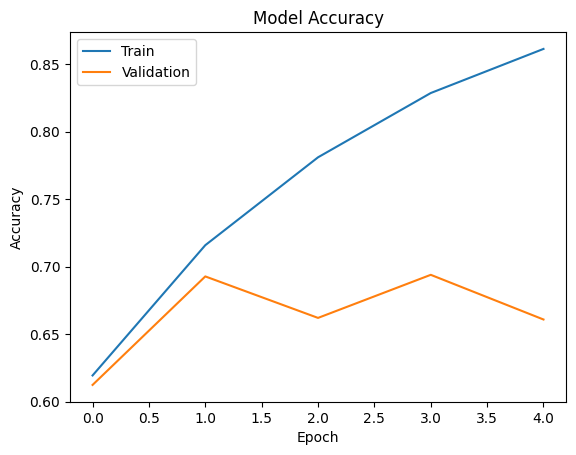

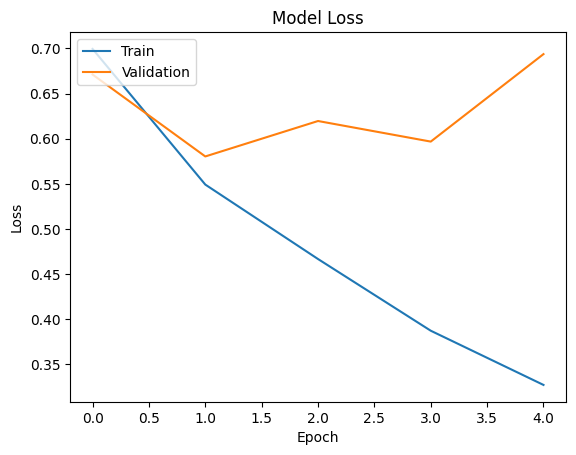

In [61]:
import matplotlib.pyplot as plt

# Assuming you have a history object from model.fit()
# history = model.fit(...)

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


In [62]:
# Assume 'model' is your trained TensorFlow model
# Save the model in SavedModel format (can also use HDF5 format)
model.save('path_to_save_model')

# To load the model later
loaded_model = tf.keras.models.load_model('path_to_save_model')
